In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, auc, roc_curve, roc_auc_score
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X = data.drop('SalePrice', axis=1)
Y = data['SalePrice']

In [4]:
from sklearn.model_selection import train_test_split
d_train, d_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
cat_feat = list(data.dtypes[data.dtypes == object].index)

num_feat = [f for f in data if f not in (cat_feat + ['ID', 'SalePrice'])]

# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(d_train[cat_feat], columns=cat_feat)
dummy_test = pd.get_dummies(d_test[cat_feat], columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]


# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([d_train[num_feat].fillna(-999),
                     dummy_train], axis=1)

X_test = pd.concat([d_test[num_feat].fillna(-999),
                     dummy_test], axis=1)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf_tree = DecisionTreeClassifier(max_depth=15, min_samples_leaf=20)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
scores = cross_val_score(clf_tree, X_train, y_train, cv=10)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.00520833, 0.00900901, 0.02222222, 0.02352941, 0.03636364,
       0.05714286, 0.        , 0.        , 0.        , 0.        ])

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf_RF = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=0)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

''

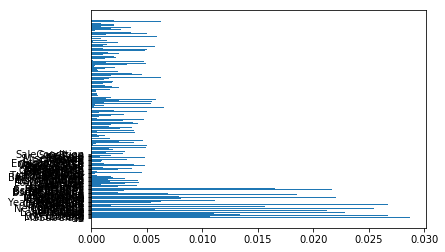

In [12]:
plt.barh(np.arange(len(clf_RF.feature_importances_)), clf_RF.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)
''

In [13]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(C=0.1)

clf_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred_RF = clf_RF.predict_proba(X_test)[:, 1]
y_pred_lin = clf_lr.predict_proba(X_test)[:, 1]

In [19]:
def show_auc(y, y_pred, plot_label='', prin=True):    
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    if prin:
        print('ROC AUC: {0:.4f}'.format(auc_val))
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    return auc_val

In [58]:
y_test_np = np.array(y_test)
#print(type(y_test))
r = y_test_np.astype(float)
#print(len(r.values.tolist()), type(float(r.values.tolist())[1]))
print(len(np.ndarray.tolist(r)), type(np.ndarray.tolist(r)))
print(len(np.ndarray.tolist(y_pred_lin)), type(np.ndarray.tolist(y_pred_lin)))




f1_score(np.ndarray.tolist(r), np.ndarray.tolist(r), average='samples')



#aucs = []
#alpha_space = np.linspace(0, 1, 100)
#for alpha in alpha_space:
#    y_pred_weight = alpha * y_pred_lin + (1 - alpha) * y_pred_RF
#    f1_score(y_test.values.tolist(), np.ndarray.tolist(y_pred_weight), average='samples') 
    #fpr, tpr, _ = roc_curve(y_test_np, y_pred_weight)
    #aucs.append(show_auc(y_test_np, y_pred_weight, prin=False, plot_label=str(alpha)))
aucs = np.array(aucs)    

292 <class 'list'>
292 <class 'list'>


ValueError: Sample-based precision, recall, fscore is not meaningful outside multilabel classification. See the accuracy_score instead.